# CV Task

You are given the original and degraded versions of a few images. Your task is to write a network which can fix the degraded images.

Complete the function `fix` at the end of the "Evaluation" block so that it can take a degraded image, and return a fixed image (that looks as much like the original non-degraded version as possible). **Read the doc-string of the fix function to see the format it expects, otherwise the displayed images will look extremely strange.**

Before submission, get this notebook in a state such that the `fix` function can directly be called on an image. Also, please make sure that 5 images are displayed in the result block. Without that, your submission will not be evaluated.

# Setup:

## Intended Structure after Setup

Run the blocks in this section to get the following directory structure:
```
/content
│
└───cargill-pubfig831
    │
    └───correct
    │   │
    │   └───train
    │   │   │
    │   │   └───Adam Sandler
    │   │   │   │   train__000001-000000.jpg
    │   │   │   │   train__000001-000001.jpg
    │   │   │   │   train__000001-000002.jpg
    │   │   │   │   ...
    │   │   │
    │   │   └───Alec Baldwin
    │   │   │   │   train__000002-000000.jpg
    │   │   │   │   train__000002-000001.jpg
    │   │   │   │   ...
    │   │   │
    │   │   └───Angelina Jolie
    │   │   │   │   train__000003-000000.jpg
    │   │   │   │   train__000003-000001.jpg
    │   │   │   │   ...
    │   │   │
    │   │   │ ...
    │   │
    │   └───test
    │       │
    │       └───Adam Sandler
    │       │   │   test__000001-000000.jpg
    │       │   │   test__000001-000001.jpg
    │       │   │   ...
    │       │
    │       └───Alec Baldwin
    │       │   │   test__000002-000000.jpg
    │       │   │   ...
    │       │
    │       └───Angelina Jolie
    │       │   │   test__000003-000000.jpg
    │       │   │   ...
    │       │
    │       │ ...
    │
    │
    └───degraded
        │   <Same directory structure as 'correct'>
```

Every image in the degraded directory is a degraded version of the image with the same name in the correct directory. e.g. `/content/cargill-pubfig831/degraded/Adam Sandler/train__000001-000002.jpg` is the degraded version of `/content/cargill-pubfig831/correct/Adam Sandler/train__000001-000002.jpg`

## Installation (pip etc)
Add any other installation commands you want to in this block.

In [ ]:
!pip install GPUtil
!pip install tqdm
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install torchvision

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=852165afef00af3f6fe28609721a03fcb4da0a0124b00aba59fba866dfcb8cb2
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


## Downloading and Generating Dataset
Run this block only once. Do not modify it. Also, don't call the degrade function in your code anywhere. You should treat the degradation process as a black box.

In [ ]:
import os
from tqdm import tqdm
from glob import glob

import cv2
import numpy as np


def degrade(path: str) -> None:
    """Load image at `input_path`, distort and save as `output_path`"""
    SHIFT = 2
    image = cv2.imread(path)
    to_swap = np.random.choice([False, True], image.shape[:2], p=[.8, .2])
    swap_indices = np.where(to_swap[:-SHIFT] & ~to_swap[SHIFT:])
    swap_vals = image[swap_indices[0] + SHIFT, swap_indices[1]]
    image[swap_indices[0] + SHIFT, swap_indices[1]] = image[swap_indices]
    image[swap_indices] = swap_vals
    cv2.imwrite(path, image)

!wget http://briancbecker.com/files/downloads/pubfig83lfw/pubfig83lfw_raw_in_dirs.zip
!unzip pubfig83lfw_raw_in_dirs.zip
!rm pubfig83lfw_raw_in_dirs.zip
!mkdir cargill-pubfig831
!mv pubfig83lfw_raw_in_dirs cargill-pubfig831/correct
!rm -r cargill-pubfig831/correct/distract
!cp -r cargill-pubfig831/correct cargill-pubfig831/degraded

for image_path in tqdm(glob('cargill-pubfig831/degraded/*/*/*.jpg')):
    degrade(image_path)

Streaming output truncated to the last 5000 lines.
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000051.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000052.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000053.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000054.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000055.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000056.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000057.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000058.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000059.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000060.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh Laurie/train__000036-000061.jpg  
  inflating: pubfig83lfw_raw_in_dirs/train/Hugh

100%|██████████| 13002/13002 [01:18<00:00, 165.86it/s]


# **Checking Free Memory**
This block is just so that you can have an idea of the resources you have at hand on the Google Collab system.

In [ ]:
import psutil
import humanize
import os
import GPUtil as GPU
gpu = GPU.getGPUs()[0]
process = psutil.Process(os.getpid())
print(f"Gen RAM: Free {humanize.naturalsize(psutil.virtual_memory().available)} | Proc size {humanize.naturalsize(process.memory_info().rss)}")
print(f"GPU RAM: Free {gpu.memoryFree:.0f}MB | Used {gpu.memoryUsed:.0f}MB | Util {gpu.memoryUtil*100:.0f}% | Total {gpu.memoryTotal:.0f}MB")

Gen RAM: Free 12.7 GB | Proc size 144.7 MB
GPU RAM: Free 11441MB | Used 0MB | Util 0% | Total 11441MB


# **Main Code**

## Imports

In [ ]:
from PIL import Image
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import os
from torchvision import transforms as T
from collections import defaultdict, deque
import datetime
import errno
import os
import time
import torch.distributed as dist
import math

### **Constants and Hyperparemeters**

In [ ]:
#use gpu or not 
gpu = False
device = torch.device("cpu")

#Parameters for optimizers
lr = 1e-01
betas=(0.9, 0.999)
eps=1e-08
weight_decay=0.0005

#number of training iterations
num_iters = 60
#number of steps to take before saving an output image
#saving_frequency = 250
#where to put the output
#output_name = 'output/output'


In [ ]:
class SmoothedValue(object):
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        if not is_dist_avail_and_initialized():
            return
        t = torch.tensor([self.count, self.total], dtype=torch.float64, device='cuda')
        dist.barrier()
        dist.all_reduce(t)
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median,
            avg=self.avg,
            global_avg=self.global_avg,
            max=self.max,
            value=self.value)


def all_gather(data):
    """
    Run all_gather on arbitrary picklable data (not necessarily tensors)
    Args:
        data: any picklable object
    Returns:
        list[data]: list of data gathered from each rank
    """
    world_size = get_world_size()
    if world_size == 1:
        return [data]
    data_list = [None] * world_size
    dist.all_gather_object(data_list, data)
    return data_list


def reduce_dict(input_dict, average=True):
    """
    Args:
        input_dict (dict): all the values will be reduced
        average (bool): whether to do average or sum
    Reduce the values in the dictionary from all processes so that all processes
    have the averaged results. Returns a dict with the same fields as
    input_dict, after reduction.
    """
    world_size = get_world_size()
    if world_size < 2:
        return input_dict
    with torch.no_grad():
        names = []
        values = []
        # sort the keys so that they are consistent across processes
        for k in sorted(input_dict.keys()):
            names.append(k)
            values.append(input_dict[k])
        values = torch.stack(values, dim=0)
        dist.all_reduce(values)
        if average:
            values /= world_size
        reduced_dict = {k: v for k, v in zip(names, values)}
    return reduced_dict

class MetricLogger(object):
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if isinstance(v, torch.Tensor):
                v = v.item()
            assert isinstance(v, (float, int))
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError("'{}' object has no attribute '{}'".format(
            type(self).__name__, attr))

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(
                "{}: {}".format(name, str(meter))
            )
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ''
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt='{avg:.4f}')
        data_time = SmoothedValue(fmt='{avg:.4f}')
        space_fmt = ':' + str(len(str(len(iterable)))) + 'd'
        if torch.cuda.is_available():
            log_msg = self.delimiter.join([
                header,
                '[{0' + space_fmt + '}/{1}]',
                'eta: {eta}',
                '{meters}',
                'time: {time}',
                'data: {data}',
                'max mem: {memory:.0f}'
            ])
        else:
            log_msg = self.delimiter.join([
                header,
                '[{0' + space_fmt + '}/{1}]',
                'eta: {eta}',
                '{meters}',
                'time: {time}',
                'data: {data}'
            ])
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0 or i == len(iterable) - 1:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time),
                        memory=torch.cuda.max_memory_allocated() / MB))
                else:
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time)))
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print('{} Total time: {} ({:.4f} s / it)'.format(
            header, total_time_str, total_time / len(iterable)))


In [ ]:
def tensor_to_img(tensor, filename):
  tensor = tensor.view(tensor.shape[1:])
  if gpu:
    tensor = tensor.cuda()
  tensor_to_img = torchvision.transforms.Compose([torchvision.transforms.ToPILImage()])
  img = tensor_to_img(tensor)
  img.save(filename)

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

def warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor):
    def f(x):
        if x >= warmup_iters:
            return 1
        alpha = float(x) / warmup_iters
        return warmup_factor * (1 - alpha) + alpha

    return torch.optim.lr_scheduler.LambdaLR(optimizer, f)

def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
class ImageDatasets(torch.utils.data.Dataset):
  def __init__(self, correct, degraded, transform = None):
    self.correct_root = correct
    self.degraded_root = degraded
    self.images_correct = getListOfFiles(self.correct_root)
    self.images_degraded = getListOfFiles(self.degraded_root)
    self.transform = transform

  
  def __getitem__(self, idx):
    correct_img_path=self.images_correct[idx]
    degraded_img_path = self.images_degraded[idx]   
    img = Image.open(degraded_img_path)
    target = Image.open(correct_img_path)

    if self.transform:
      img = self.transform(img)
      target = self.transform(target)

    return img, target 

  def __len__(self):
    return len(self.images_degraded)


### Models

In [ ]:
class pixel_shuffle_upsampling(nn.Module):
    def __init__(self):
        super(pixel_shuffle_upsampling, self).__init__()
        self.dconv_1 = nn.Conv2d(3, 8, 5, stride=2, padding=2)
        self.dbn_1 = nn.BatchNorm2d(8)

        self.dconv_2 = nn.Conv2d(8, 16, 5, stride=2, padding=2)
        self.dbn_2 = nn.BatchNorm2d(16)

        self.dconv_3 = nn.Conv2d(16, 32, 5, stride=2, padding=2)
        self.dbn_3 = nn.BatchNorm2d(32)
        self.sconv_3 = nn.Conv2d(32, 4, 5, stride=1, padding=2)

        self.dconv_4 = nn.Conv2d(32, 64, 5, stride=2, padding=2)
        self.dbn_4 = nn.BatchNorm2d(64)
        self.sconv_4 = nn.Conv2d(64, 4, 5, stride=1, padding=2)

        self.dconv_5 = nn.Conv2d(64, 128, 5, stride=2, padding=2)
        self.dbn_5 = nn.BatchNorm2d(128)
        self.sconv_5 = nn.Conv2d(128, 4, 5, stride=1, padding=2)

        self.dconv_6 = nn.Conv2d(128, 256, 5, stride=2, padding=2)
        self.dbn_6 = nn.BatchNorm2d(256)

        self.uconv_5 = nn.Conv2d(68, 128, 5, stride=1, padding=2)
        self.ubn_5 = nn.BatchNorm2d(128)

        self.uconv_4 = nn.Conv2d(36, 64, 5, stride=1, padding=2)
        self.ubn_4 = nn.BatchNorm2d(64)

        self.uconv_3 = nn.Conv2d(20, 32, 5, stride=1, padding=2)
        self.ubn_3 = nn.BatchNorm2d(32)

        self.uconv_2 = nn.Conv2d(8, 16, 5, stride=1, padding=2)
        self.ubn_2 = nn.BatchNorm2d(16)

        self.uconv_1 = nn.Conv2d(4, 16, 8, stride=1, padding=2)
        self.ubn_1 = nn.BatchNorm2d(16)

        self.outconv = nn.Conv2d(4, 3, 5, stride=1, padding=2)
        self.outbn = nn.BatchNorm2d(3)

        
    def forward(self, noise):
        down_1 = self.dconv_1(noise)
        down_1 = self.dbn_1(down_1)
        down_1 = F.leaky_relu(down_1)
       
        down_2 = self.dconv_2(down_1)
        down_2 = self.dbn_2(down_2)
        down_2 = F.leaky_relu(down_2)
     
        down_3 = self.dconv_3(down_2)
        down_3 = self.dbn_3(down_3)
        down_3 = F.leaky_relu(down_3)
        skip_3 = self.sconv_3(down_3)
        
        down_4 = self.dconv_4(down_3)
        down_4 = self.dbn_4(down_4)
        down_4 = F.leaky_relu(down_4)
        skip_4 = self.sconv_4(down_4)
        
        down_5 = self.dconv_5(down_4)
        down_5 = self.dbn_5(down_5)
        down_5 = F.leaky_relu(down_5)
        skip_5 = self.sconv_5(down_5)
      
        down_6 = self.dconv_6(down_5)
        down_6 = self.dbn_6(down_6)
        down_6 = F.leaky_relu(down_6)
        
        up_5 = F.pixel_shuffle(down_6, 2)
        up_5 = torch.cat([up_5, skip_5], 1)
        up_5 = self.uconv_5(up_5)
        up_5 = self.ubn_5(up_5)
        up_5 = F.leaky_relu(up_5)

        up_4 = F.pixel_shuffle(up_5, 2)
        up_4 = torch.cat([up_4, skip_4], 1)
        up_4 = self.uconv_4(up_4)
        up_4 = self.ubn_4(up_4)
        up_4 = F.leaky_relu(up_4)
        
        up_3 = F.pixel_shuffle(up_4, 2)
        up_3 = torch.cat([up_3, skip_3], 1)
        up_3 = self.uconv_3(up_3)
        up_3 = self.ubn_3(up_3)
        up_3 = F.leaky_relu(up_3)

        up_2 = F.pixel_shuffle(up_3, 2)
        up_2 = self.uconv_2(up_2)
        up_2 = self.ubn_2(up_2)
        up_2 = F.leaky_relu(up_2)

        up_1 = F.pixel_shuffle(up_2, 2)
        up_1 = self.uconv_1(up_1)
        up_1 = self.ubn_1(up_1)
        up_1 = F.leaky_relu(up_1)
        
        out = F.pixel_shuffle(up_1, 2)
        out = self.outconv(out)
        out = self.outbn(out)
        out = F.sigmoid(out)
        
        return out

In [ ]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=100):
  model.train()
  metric_logger = MetricLogger(delimiter="  ")
  metric_logger.add_meter('lr', SmoothedValue(window_size=1, fmt='{value:.6f}'))
  header = 'Epoch: [{}]'.format(epoch)
  
  lr_scheduler = None
  if epoch==0:
    warmup_factor = 1./1000
    warmup_iters = min(1000, len(data_loader)-1)
    lr_scheduler = warmup_lr_scheduler(optimizer, warmup_iters, warmup_factor)
  
  for images, targets in metric_logger.log_every(data_loader, print_freq, header):
    #import ipdb; ipdb.set_trace()
    images = torch.stack(list(images), dim=0).to(device)
    targets = torch.stack(list(targets), dim=0).to(device)

    preds = model(images)

    criterion = nn.MSELoss()
    losses = criterion(targets,preds)
    loss_value = losses.item()
    if not math.isfinite(loss_value):
      print("Loss is {}, stopping training".format(loss_value))
      print(loss_dict_reduced)
      sys.exit(1)

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()

    if lr_scheduler is not None:
      lr_scheduler.step()

    metric_logger.update(loss=losses)
    metric_logger.update(lr=optimizer.param_groups[0]["lr"])

  return metric_logger

@torch.no_grad()
def evaluate(model, data_loader, device):
  n_threads = torch.get_num_threads()
  # FIXME remove this and make paste_masks_in_image run on the GPU
  torch.set_num_threads(1)
  cpu_device = torch.device("cpu")
  model.eval()
  metric_logger = MetricLogger(delimiter="  ")
  header = 'Test:'
   
  for images, targets in metric_logger.log_every(data_loader, 100, header):
    images = torch.stack(list(images), dim=0).to(device)
    targets = torch.stack(list(targets), dim=0).to(device)
    
    if torch.cuda.is_available():
      torch.cuda.synchronize()
    
    model_time = time.time()
    outputs = model(images)
    model_time = time.time() - model_time

    losses = torch.sum((targets-outputs)**2)
    loss_value = losses.item()
    metric_logger.update(loss=losses)

  return metric_logger

In [ ]:
def main():
  #datasets
  train_correct='/content/cargill-pubfig831/correct/train/'
  train_degraded='/content/cargill-pubfig831/degraded/train/'
  test_correct ='/content/cargill-pubfig831/correct/test/'
  test_degraded = '/content/cargill-pubfig831/degraded/test/'

  save_filename ='best-model.h5'

  train_dataset = ImageDatasets(train_correct, train_degraded, get_transform(train=True))
  test_dataset = ImageDatasets(test_correct, test_degraded, get_transform(train=False))

  ##Random shuffling of the datasets 
  indices = torch.randperm(len(train_dataset)).tolist()
  train_dataset = torch.utils.data.Subset(train_dataset, indices)

  test_indices = torch.randperm(len(test_dataset)).tolist()
  test_dataset = torch.utils.data.Subset(test_dataset, test_indices[:1000])

  train_data_loader =  torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, collate_fn=collate_fn)
  test_data_loader =  torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=4, collate_fn=collate_fn)
  
  model = pixel_shuffle_upsampling()

  if saved_data:
    PATH = 'best-model.h5'
    model.load_state_dict(torch.load(PATH))

 
  device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
  model.to(device)

  
  ##Adam Optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas = betas, eps=eps, weight_decay=weight_decay)

  ##Learning rate scheduler 
  lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=3, gamma=0.1)

  for epoch in tqdm(range(num_iters)):                                                 
    train_one_epoch(model, optimizer,train_data_loader, device, epoch, print_freq=100)
    if ((epoch+1)%5 == 0):
      filename = 'best-model-epoch-{}.h5'.format(epoch+1)
      torch.save(model.state_dict(),filename)

    #torch.save(model.state_dict(), save_filename)
    lr_scheduler.step()
    evaluate(model, test_data_loader, device)
    
  if gpu:
    torch.cuda.empty_cache()

In [ ]:
saved_data=False
main()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: [0]  [   0/1090]  eta: 0:10:18  lr: 0.000200  loss: 0.0315 (0.0315)  time: 0.5674  data: 0.3580  max mem: 217
Epoch: [0]  [ 100/1090]  eta: 0:02:10  lr: 0.010190  loss: 0.0398 (0.0411)  time: 0.1273  data: 0.0147  max mem: 238
Epoch: [0]  [ 200/1090]  eta: 0:01:55  lr: 0.020180  loss: 0.0458 (0.0416)  time: 0.1266  data: 0.0146  max mem: 238
Epoch: [0]  [ 300/1090]  eta: 0:01:41  lr: 0.030170  loss: 0.0367 (0.0420)  time: 0.1260  data: 0.0139  max mem: 238
Epoch: [0]  [ 400/1090]  eta: 0:01:28  lr: 0.040160  loss: 0.0391 (0.0423)  time: 0.1270  data: 0.0144  max mem: 238
Epoch: [0]  [ 500/1090]  eta: 0:01:15  lr: 0.050150  loss: 0.0419 (0.0433)  time: 0.1279  data: 0.0160  max mem: 238
Epoch: [0]  [ 600/1090]  eta: 0:01:02  lr: 0.060140  loss: 0.0527 (0.0441)  time: 0.1282  data: 0.0161  max mem: 238
Epoch: [0]  [ 700/1090]  eta: 0:00:49  lr: 0.070130  loss: 0.0437 (0.0446)  time: 0.1272  data: 0.0150  max mem: 238
Epoch: [0]  [ 800/1090]  eta: 0:00:37  lr: 0.080120  loss: 0.048

  2%|▏         | 1/60 [02:28<2:26:10, 148.65s/it]

Test:  [124/125]  eta: 0:00:00  loss: 295487.5625 (293188.0949)  time: 0.0702  data: 0.0153  max mem: 238
Test: Total time: 0:00:09 (0.0754 s / it)
Epoch: [1]  [   0/1090]  eta: 0:09:33  lr: 0.100000  loss: 0.0517 (0.0517)  time: 0.5265  data: 0.3461  max mem: 238
Epoch: [1]  [ 100/1090]  eta: 0:02:09  lr: 0.100000  loss: 0.0466 (0.0541)  time: 0.1271  data: 0.0145  max mem: 238
Epoch: [1]  [ 200/1090]  eta: 0:01:54  lr: 0.100000  loss: 0.0462 (0.0522)  time: 0.1262  data: 0.0143  max mem: 238
Epoch: [1]  [ 300/1090]  eta: 0:01:41  lr: 0.100000  loss: 0.0457 (0.0509)  time: 0.1273  data: 0.0149  max mem: 238
Epoch: [1]  [ 400/1090]  eta: 0:01:28  lr: 0.100000  loss: 0.0429 (0.0500)  time: 0.1268  data: 0.0147  max mem: 238
Epoch: [1]  [ 500/1090]  eta: 0:01:15  lr: 0.100000  loss: 0.0468 (0.0501)  time: 0.1265  data: 0.0143  max mem: 238
Epoch: [1]  [ 600/1090]  eta: 0:01:02  lr: 0.100000  loss: 0.0419 (0.0496)  time: 0.1274  data: 0.0151  max mem: 238
Epoch: [1]  [ 700/1090]  eta: 0:0

## Evaluation

In [ ]:
import numpy as np

def fix(image: np.ndarray) -> np.ndarray:
    """
    This function should take a degraded image in BGR format as a 250x250x3
    numpy array with dtype np.uint8, and return its fixed version in the same format.

    Make sure you don't return floating point values, or RGB instead of BGR, else the
    image will look completely wrong when displayed.
    """
    PATH='best-model-epoch-50.h5'
    model = pixel_shuffle_upsampling()
    model.load_state_dict(torch.load(PATH))
    model.eval()
    image_tensor = torchvision.transforms.functional.to_tensor(image)
    image_tensor= image_tensor.unsqueeze(0)
    output = model(image_tensor)
    output = output.squeeze()
    output = torchvision.transforms.ToPILImage()(output)
    result = np.asarray(output)
    result = result[:, :, [2, 1, 0]]
    #print(result.shape)
    return result


# Results
Run this block after you're done to look at some of the results of the fix function. Do not change this block in any way. Instead write the fix function in a way that makes sure that this block works.

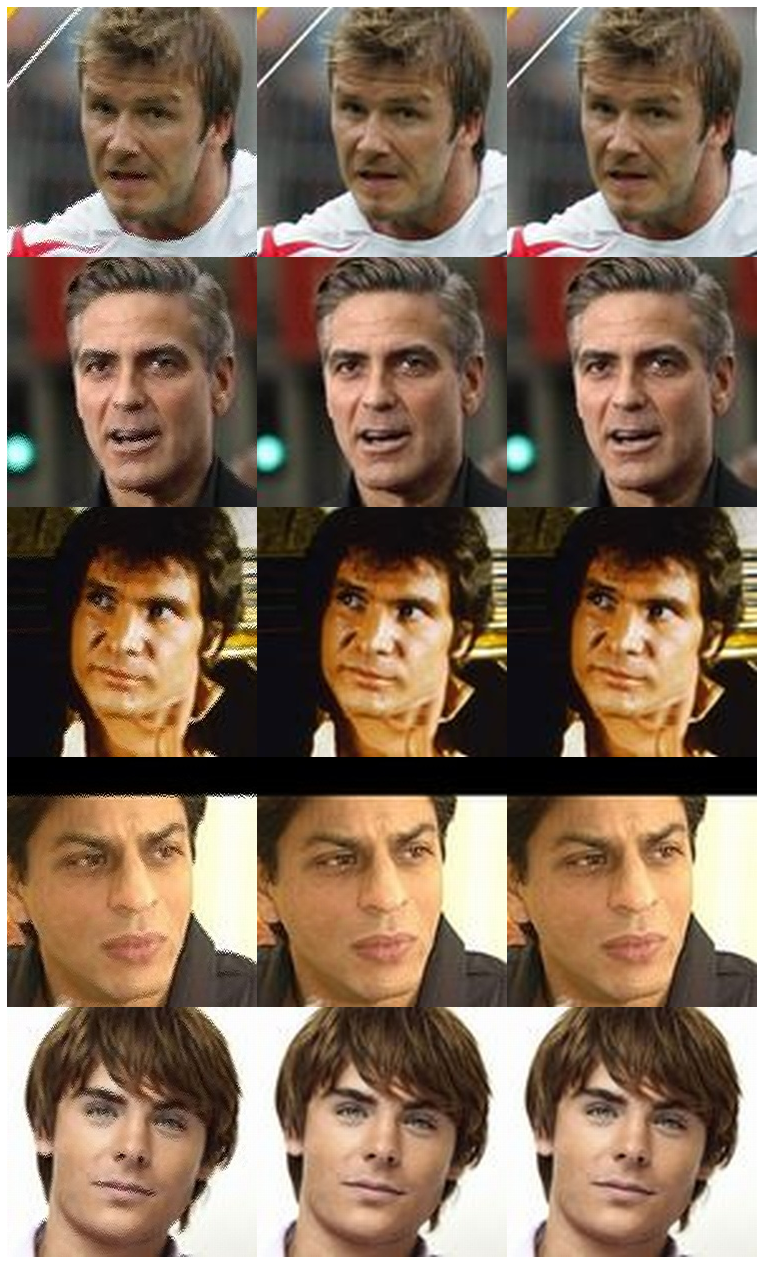

In [ ]:
%matplotlib inline

import os
import random
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np

NUM_DISPLAY = 5

files = glob('/content/cargill-pubfig831/correct/test/*/*')
grid = []

for path in random.sample(files, NUM_DISPLAY):
    correct = cv2.imread(path)
    split = path.split('/')
    degraded = cv2.imread('/'.join([*split[:3], 'degraded', *split[4:]]))
    degraded_cvt = cv2.cvtColor(degraded, cv2.COLOR_RGB2BGR)
    fixed = fix(degraded_cvt)
    grid.append(np.column_stack([degraded, fixed, correct]))

image = np.row_stack(grid)
dpi = float(plt.rcParams['figure.dpi'])
figsize = image.shape[1] / dpi, image.shape[0] / dpi
ax = plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(image[..., ::-1])
plt.show()